In [ ]:
# Import necessary libraries
!pip install KModes
import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('Copy of Online Retail - Online Retail.csv', encoding='ISO-8859-1')

# --- Data Cleaning ---
# Drop rows with missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

# Convert CustomerID to integer
df['CustomerID'] = df['CustomerID'].astype(int)

# For this demonstration, we'll simplify the data.
# We'll use the 'Country' and create a new categorical feature from 'StockCode'.
# We'll take the top 5 most frequent StockCodes and label all others as 'Other'.
top_5_stockcodes = df['StockCode'].value_counts().nlargest(5).index
df['StockCodeSimple'] = df['StockCode'].apply(lambda x: x if x in top_5_stockcodes else 'Other')

# Select the features for clustering
cluster_data = df[['Country', 'StockCodeSimple']].copy()

# Take a sample for faster processing
cluster_data_sample = cluster_data.sample(n=10000, random_state=42)

print("Shape of the sampled data:", cluster_data_sample.shape)
print("\nFirst 5 rows of the data:")
print(cluster_data_sample.head())

Shape of the sampled data: (10000, 2)

First 5 rows of the data:
               Country StockCodeSimple
47912   United Kingdom           Other
342630  United Kingdom           Other
288183  United Kingdom           Other
325368  United Kingdom           Other
331450  United Kingdom           Other


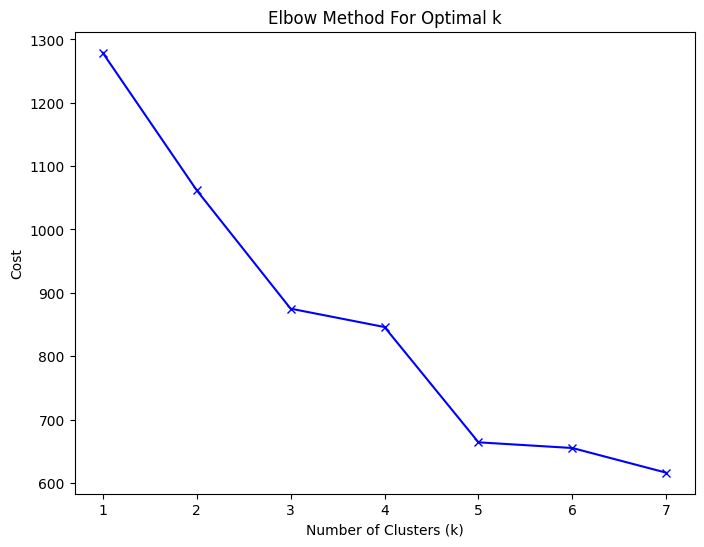

In [ ]:
# --- Elbow Method to find the optimal k ---
cost = []
K = range(1, 8)
for k in K:
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0, random_state=42)
    km.fit_predict(cluster_data_sample)
    cost.append(km.cost_)

# Plot the elbow
plt.figure(figsize=(8, 6))
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# --- Building the K-Modes model with k=3 ---
k = 3
km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1, random_state=42)

# Fit the model and get the cluster labels
clusters = km.fit_predict(cluster_data_sample)

# Add the cluster labels to our dataframe
cluster_data_sample['Cluster'] = clusters

print("\nFirst 5 rows with cluster labels:")
print(cluster_data_sample.head())

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 804, cost: 1033.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 654, cost: 875.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 804, cost: 1033.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 804, cost: 1033.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 804, cost: 1033.0
Best run was number 2

First 5 rows with cluster labels:
               Country StockCodeSimple  Cluster
47912   United Kingdom           Other        0
342630  United Kingdom           Other        0
288183  United Kingdom           Other        0
325368  United Kingdom           Other        0
331450  United Kingdom           Other        0


In [ ]:
# Print the cluster centroids (modes)
print("Cluster Centroids (Modes):")
print(km.cluster_centroids_)

# Print the size of each cluster
print("\nCluster Sizes:")
print(cluster_data_sample['Cluster'].value_counts())

Cluster Centroids (Modes):
[['United Kingdom' 'Other']
 ['France' 'Other']
 ['Germany' 'Other']]

Cluster Sizes:
Cluster
0    9596
2     217
1     187
Name: count, dtype: int64


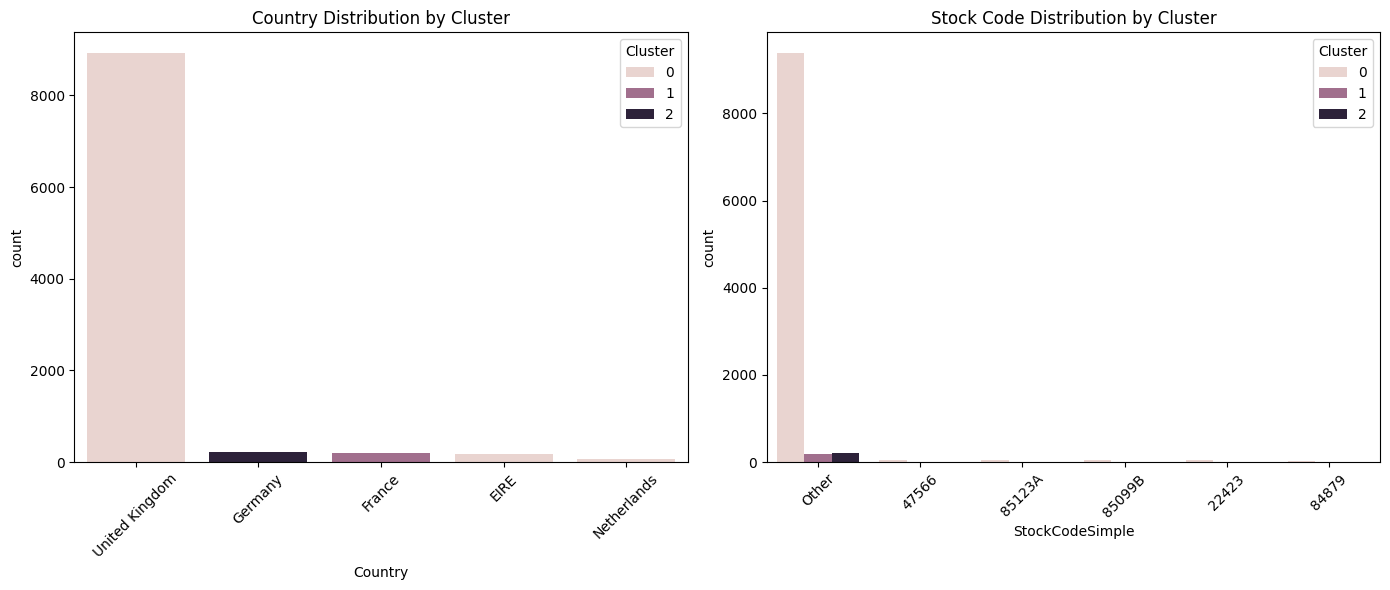

In [ ]:
# --- Visualize the Clusters ---
plt.figure(figsize=(14, 6))

# Plot for Country
plt.subplot(1, 2, 1)
sns.countplot(data=cluster_data_sample, x='Country', hue='Cluster', order=cluster_data_sample['Country'].value_counts().iloc[:5].index)
plt.title('Country Distribution by Cluster')
plt.xticks(rotation=45)

# Plot for StockCodeSimple
plt.subplot(1, 2, 2)
sns.countplot(data=cluster_data_sample, x='StockCodeSimple', hue='Cluster')
plt.title('Stock Code Distribution by Cluster')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()